In [1]:
from ffnavpy.satellite import Satellite, OBC

import ffnavpy.utils as utl
import numpy as np

from ffnavpy.simulator import Simulator
from ffnavpy.simcase import ChiefDeputyCase
from ffnavpy.satellite import CommandSequence

from ffnavpy.control_laws import ETM

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline




c:\Users\juan.bermejo\.conda\envs\ffnavpy-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Initial state of deputy [km, km/s]

x0 = np.array(
        [
            1.5097937630e11,
            -4.6840029080e-08,
            1.8369701987e-08,
            -6.0196990433e-15,
            1.5667113355e02,
            -1.1858897424e02,
        ]
        )

# x0 = np.array([ 1.51287312e+08,  0.00000000e+00, -7.70118240e+04,  2.38772827e-14,
    #    -2.68181170e-01,  0.00000000e+00])

# Initial relative state [km, km/s]
dx0 = np.array([0.110, 0.09, 0.105, 1e-6, 0, 0]) * 1000

# Initial state chief [km, km/s]
x0_cs = x0 + dx0

# State commanded
x_target = np.array([0.1, 0.1, 0.1, 0, 0, 0]) * 1000


# Duration of the simulation [s]
tf = 3600

# Time step of simulation [s]
dT = 1

# Create satellites with their corresponding initial states
LiteBird = Satellite(x0)
CalSat = Satellite(x0_cs,1,7)

# OBC config
t_star = OBC.DefConfigOBC.ts
w0_slow = utl.compute_bandwidth_from_tau(300, t_star)
w0_fast = utl.compute_bandwidth_from_tau(300, t_star)
ConfigOBC = {'w0_estimation': w0_fast, 
             'w0_control': w0_slow,
             'x_target': x_target, 'estimation_mode': 'kalman',
             'Tsk': 1,
             'control_mode': "ETM",
             'sigma_r0': 1e-7,
             'sigma_v0': 1e-8,
             'sigma_x': 1e-4,
             'sigma_y': 1e-4,
             'sigma_z': 1e-4,
             'period': 600}

configSim = {'sigma_distance': 1e-06, 'sigma_angle': 0.25}

cmd_sequence = CommandSequence()
# cmd_sequence.add_command('change_control_mode', 'simple', 1000)
# cmd_sequence.add_command('change_estimation_mode', 'kalman', 3000)
# cmd_sequence.add_command('change_control_mode', 'LQR', 4800)
# cmd_sequence.add_command('change_control_mode', 'ETM', 3600*2)

# Create predefined case for chief-deputy formation
simcase = ChiefDeputyCase(LiteBird, CalSat, cmd_sequence=cmd_sequence, configOBC=ConfigOBC)

# Create simulator with the defined case
sim = Simulator(simcase, dT)


# Simulate
sim.simulate(tf)

100%|██████████| 3601/3601 [00:10<00:00, 331.96it/s]


0

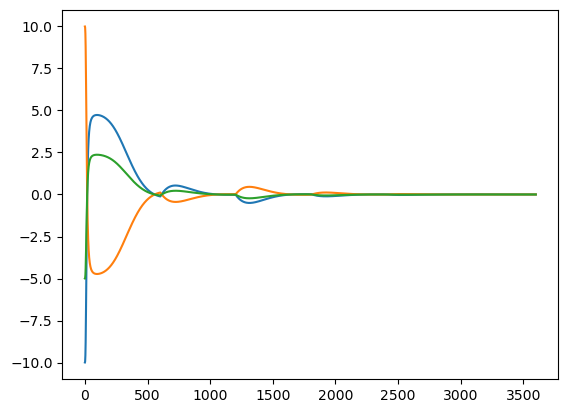

In [8]:
plt.plot(sim.report.x_estimated[0:3].T - sim.report.relative_state[0:3].T)

Text(0, 0.5, 'Distance [m]')

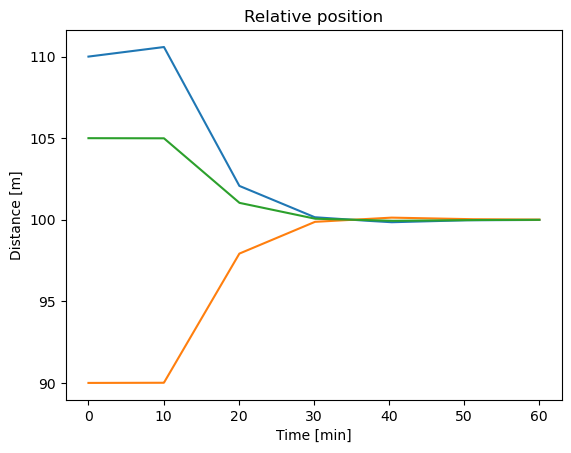

In [9]:
# plt.plot(sim.simcase.deputy.trajectory.time/60,np.linalg.norm(sim.report.relative_state[0:3],axis=0))
plt.plot(sim.simcase.deputy.trajectory.time/60, sim.report.relative_state[0:3].T)

plt.title('Relative position')
plt.xlabel('Time [min]')
plt.ylabel('Distance [m]')
# plt.ylim([173,173.4])
# plt.hlines(np.sqrt(3*100**2),sim.simcase.deputy.trajectory.time[n]/86400, sim.simcase.deputy.trajectory.time[-1]/86400, colors='k', linewidth=0.5)
# # plt.hlines([0],sim.simcase.deputy.trajectory.time[-1]/60, sim.simcase.deputy.trajectory.time[n]/60, colors='k')
# # plt.vlines([1000/60, 4800/60], -10, 15, colors='k', linestyles='dotted')
# # plt.text(-3, 15, 'No control')
# # plt.text(42, 15, 'P control')
# # plt.text(95, 15, 'LQR')
# # plt.legend(['x', 'y', 'z'],loc=4)
# plt.savefig('position_etm')

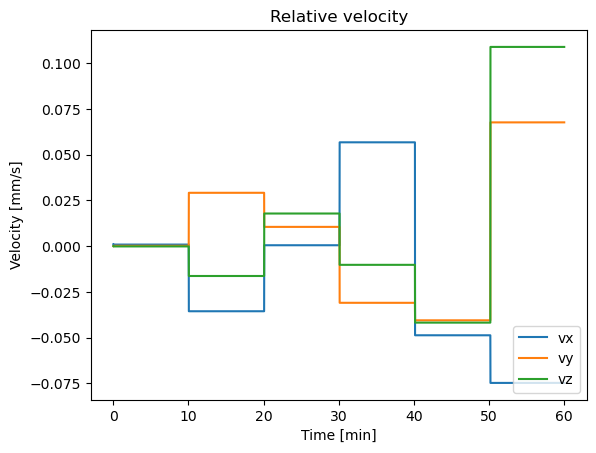

In [5]:
plt.plot(sim.report.time/60,sim.report.relative_state[3:].T)
plt.title('Relative velocity')
plt.xlabel('Time [min]')
plt.ylabel('Velocity [mm/s]')
# plt.vlines([1000/60, 4800/60], -15, 25, colors='k', linestyles='dotted')
# plt.text(-3, 25, 'No control')
# plt.text(42, 25, 'P control')
# plt.text(95, 25, 'LQR')
plt.legend(['vx', 'vy', 'vz'], loc=4)
# plt.savefig('velocity')

In [6]:
plt.plot(sim.simcase.deputy.trajectory.time[n:]/86400,sim.simcase.report.u_cmd[n:,:])
plt.title('Control')
plt.ylabel('Acceleration [m/s2]')
plt.xlabel('Time [days]')
# plt.vlines([1000/60, 4800/60], -0.15, 0.15, colors='k', linestyles='dotted')
# plt.text(-3, 0.15, 'No control')
# plt.text(42, 0.15, 'P control')
# plt.text(95, 0.15, 'LQR')
plt.legend(['ux', 'uy', 'uz'], loc=4)
plt.savefig("control_etm.png")

NameError: name 'n' is not defined

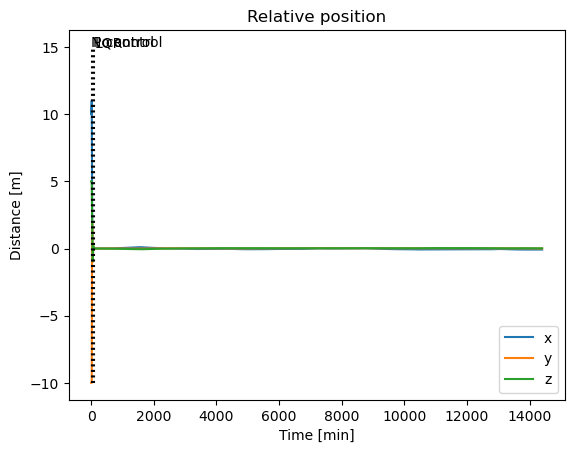

In [ ]:
plt.plot(sim.simcase.deputy.trajectory.time/60,sim.simcase.report.relative_state[:,0:3]*1e3-x_target[:3]*1e3)

plt.title('Relative position')
plt.xlabel('Time [min]')
plt.ylabel('Distance [m]')
plt.vlines([1000/60, 4800/60], -10, 15, colors='k', linestyles='dotted')
plt.text(-3, 15, 'No control')
plt.text(42, 15, 'P control')
plt.text(95, 15, 'LQR')
plt.legend(['x', 'y', 'z'],loc=4)
plt.savefig('position')

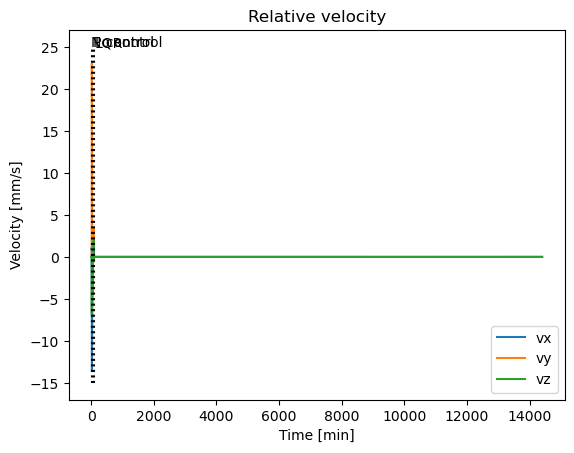

In [ ]:
plt.plot(sim.simcase.deputy.trajectory.time/60, sim.simcase.report.relative_state[:,3:6]*1e6-x_target[3:]*1e6)
plt.title('Relative velocity')
plt.xlabel('Time [min]')
plt.ylabel('Velocity [mm/s]')
plt.vlines([1000/60, 4800/60], -15, 25, colors='k', linestyles='dotted')
plt.text(-3, 25, 'No control')
plt.text(42, 25, 'P control')
plt.text(95, 25, 'LQR')
plt.legend(['vx', 'vy', 'vz'], loc=4)
plt.savefig('velocity')

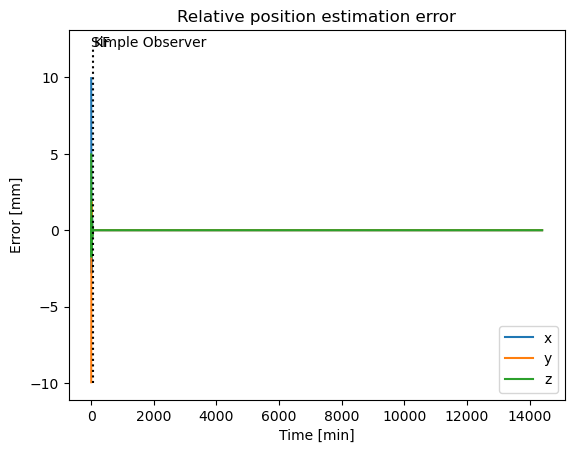

In [ ]:
plt.plot(sim.simcase.deputy.trajectory.time/60, (sim.simcase.report.relative_state[:,0:3]-sim.simcase.report.x_estimated[:,0:3]) * 1e3)
plt.title('Relative position estimation error')
plt.ylabel('Error [mm]')
plt.xlabel('Time [min]')
plt.vlines([ 3000/60], -10, 12, colors='k', linestyles='dotted')
plt.text(5, 12, 'Simple Observer')
plt.text(80, 12, 'KF')
plt.legend(['x', 'y', 'z'], loc=4)
plt.savefig("error_r_est.png")

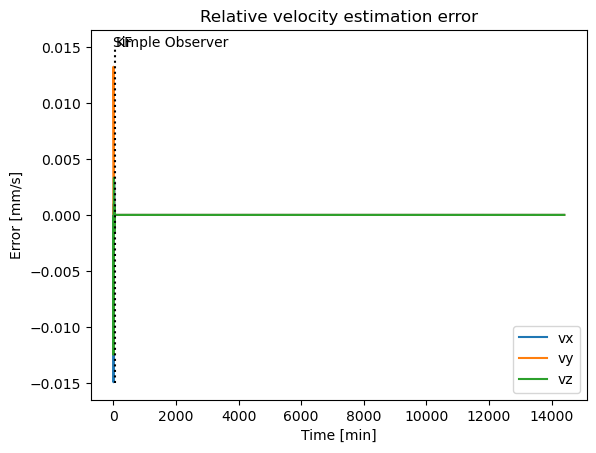

In [ ]:
plt.plot(sim.simcase.deputy.trajectory.time/60, (sim.simcase.report.relative_state[:,3:6]-sim.simcase.report.x_estimated[:,3:6]) * 1e3)
plt.title('Relative velocity estimation error')
plt.ylabel('Error [mm/s]')
plt.xlabel('Time [min]')
plt.vlines([ 3000/60], -0.015, 0.015, colors='k', linestyles='dotted')
plt.text(5, 0.015, 'Simple Observer')
plt.text(80, 0.015, 'KF')
plt.legend(['vx', 'vy', 'vz'], loc=4)
plt.savefig("error_v_est.png")

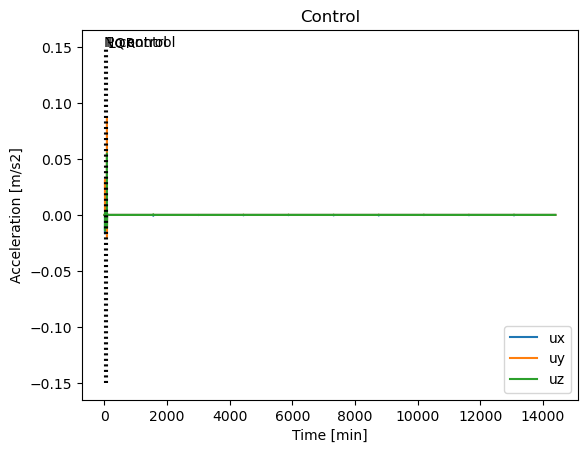

In [ ]:
plt.plot(sim.simcase.deputy.trajectory.time/60,sim.simcase.report.u_cmd[:,:])
plt.title('Control')
plt.ylabel('Acceleration [m/s2]')
plt.xlabel('Time [min]')
plt.vlines([1000/60, 4800/60], -0.15, 0.15, colors='k', linestyles='dotted')
plt.text(-3, 0.15, 'No control')
plt.text(42, 0.15, 'P control')
plt.text(95, 0.15, 'LQR')
plt.legend(['ux', 'uy', 'uz'], loc=4)
plt.savefig("control.png")